In [6]:
import ultralytics
import cv2
from ultralytics import solutions

ultralytics.checks()

Ultralytics 8.3.148 🚀 Python-3.12.1 torch-2.4.0.dev20240529 CPU (Apple M3 Pro)
Setup complete ✅ (11 CPUs, 18.0 GB RAM, 426.1/460.4 GB disk)


In [7]:
region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]

In [8]:
import torch 
print(torch.__version__)

2.4.0.dev20240529


In [9]:
# Init ObjectCounter
counter = solutions.ObjectCounter(
    show=True,  # Display the output
    region=region_points,  # Pass region points
    model="yolo11n.pt",  # model="yolo11n-obb.pt" for object counting using YOLO11 OBB model.
    classes=[0],  # If you want to count specific classes i.e person and car with COCO pretrained model.
    show_in=True,  # Display in counts
    show_out=True,  # Display out counts
    line_width=2,  # Adjust the line width for bounding boxes and text display
)

Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11n.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': [(20, 400), (1080, 400), (1080, 360), (20, 360)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}


In [10]:
cap = cv2.VideoCapture(0)

assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
                                       cv2.CAP_PROP_FRAME_HEIGHT,
                                       cv2.CAP_PROP_FPS))

# # Video writer
# video_writer = cv2.VideoWriter("counting.avi",
#                                cv2.VideoWriter_fourcc(*"mp4v"),
#                                fps, (w, h))

In [11]:
# Process video
import time
import numpy as np

s = time.time()

counting_data = np.array([s], dtype=int)
elapsed_time = 0

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = counter(im0)  # count the objects
    # video_writer.write(results.plot_im)   # write the video frames
    
    counting_data = np.append(counting_data, [int(elapsed_time), int(results.total_tracks)])
    
    print(results.total_tracks)
    
    elapsed_time += 1
    
    np.savez_compressed('counting_data', x=counting_data)
    
    time.sleep(1)
    
    
        
# cap.release()   # Release the capture
# video_writer.release()
cv2.destroyAllWindows()

0: 1080x1920 79.8ms
Speed: 1542.4ms track, 79.8ms solution per image at shape (1, 3, 1080, 1920)

1
WARNING ⚠️ no tracks found!
1: 1080x1920 20.2ms
Speed: 52.8ms track, 20.2ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
2: 1080x1920 41.2ms
Speed: 50.7ms track, 41.2ms solution per image at shape (1, 3, 1080, 1920)

0


2025-06-08 06:48:13.807 Python[48542:42374565] +[IMKClient subclass]: chose IMKClient_Modern
2025-06-08 06:48:13.807 Python[48542:42374565] +[IMKInputSession subclass]: chose IMKInputSession_Modern


WARNING ⚠️ no tracks found!
3: 1080x1920 23.0ms
Speed: 49.5ms track, 23.0ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
4: 1080x1920 18.6ms
Speed: 46.3ms track, 18.6ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
5: 1080x1920 26.3ms
Speed: 46.7ms track, 26.3ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
6: 1080x1920 23.0ms
Speed: 51.5ms track, 23.0ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
7: 1080x1920 21.1ms
Speed: 53.1ms track, 21.1ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
8: 1080x1920 19.4ms
Speed: 69.1ms track, 19.4ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
9: 1080x1920 18.9ms
Speed: 64.6ms track, 18.9ms solution per image at shape (1, 3, 1080, 1920)

0
WARNING ⚠️ no tracks found!
10: 1080x1920 17.4ms
Speed: 69.9ms track, 17.4ms solution per image at shape (1, 3, 1080, 

KeyboardInterrupt: 

In [ ]:
# for further analysis after data collection
import numpy as np

data = np.load('counting_data.npz')

print(f'start time : {data['x'][0]}')
print(data['x'][1:].reshape(-1, 2))

start time : 1749332889
[[    0     1]
 [    1     0]
 [    2     0]
 ...
 [15162     0]
 [15163     0]
 [15164     0]]


/var/folders/cn/kzxj_h3x2ts4f36s99rm3cmm0000gn/T/ipykernel_48542/1112391815.py:12: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  start_datetime_utc = datetime.datetime.utcfromtimestamp(start_time)


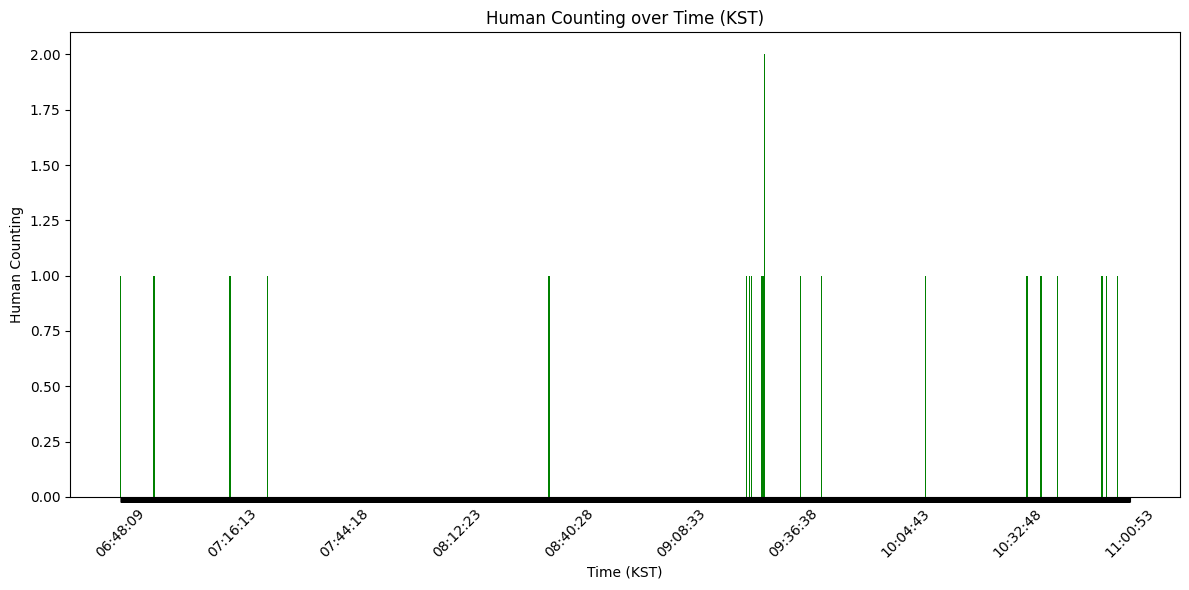

In [13]:
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt

# Load your data
data = np.load('counting_data.npz')
start_time = data['x'][0]
elapsed_and_count = data['x'][1:].reshape(-1, 2)

# Convert start time to Korea time (UTC+9)
start_datetime_utc = datetime.datetime.utcfromtimestamp(start_time)
korea_tz = pytz.timezone('Asia/Seoul')
start_datetime_korea = start_datetime_utc.replace(tzinfo=datetime.timezone.utc).astimezone(korea_tz)

# Calculate time points in KST
elapsed_seconds = elapsed_and_count[:, 0]
time_points_korea = [start_datetime_korea + datetime.timedelta(seconds=float(et)) for et in elapsed_seconds]
time_labels = [tp.strftime('%H:%M:%S') for tp in time_points_korea]

# Select 10 evenly spaced x-ticks (milestones)
total_points = len(time_labels)
indices_to_show = np.linspace(0, total_points - 1, 10, dtype=int)
filtered_labels = ['' for _ in range(total_points)]
for idx in indices_to_show:
    filtered_labels[idx] = time_labels[idx]

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(total_points), elapsed_and_count[:, 1], color='green')
plt.xlabel('Time (KST)')
plt.ylabel('Human Counting')
plt.title('Human Counting over Time (KST)')
plt.xticks(ticks=range(total_points), labels=filtered_labels, rotation=45)
plt.tight_layout()
plt.show()


TypeError: 'tuple' object is not callable